# Weighted Average Basic Recommendations

In [49]:
import numpy as np
import pandas as pd

In [50]:
credits = pd.read_csv("../Datasets/tmdb_5000_credits.csv")
movies = pd.read_csv("../Datsets/tmdb_5000_movies.csv")

In [51]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [52]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [53]:
credits.rename(columns={'movie_id':'id'}, inplace=True)
movies_merged_df = movies.merge(credits,on='id')
movies_cleaned_df = movies_merged_df.drop(['crew','revenue','title_x','title_y','keywords','spoken_languages','budget','homepage','id','original_language','production_companies','production_countries','release_date','runtime','status','tagline'],axis=1)
movies_cleaned_df.head()

,genres,original_title,overview,popularity,vote_average,vote_count,cast
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


In [54]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          4803 non-null   object 
 1   original_title  4803 non-null   object 
 2   overview        4800 non-null   object 
 3   popularity      4803 non-null   float64
 4   vote_average    4803 non-null   float64
 5   vote_count      4803 non-null   int64  
 6   cast            4803 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 300.2+ KB


## Using weighted average for each movie's average rating

                   W = (Rv + Cm)/(v + m)
    W = weighted average rating for a movie
    R = average rating for the movie on a 10-scale
    v = number of votes for the movie
    C = the mean vote across the whole report
    m = minimum no. of votes required to be in the top 250


In [55]:
v = movies_cleaned_df['vote_count']
R = movies_cleaned_df['vote_average']
C = R.mean()
m = v.quantile(0.75)

In [56]:
movies_cleaned_df['weighted_average'] = ((R*v)+(C*m))/(v + m)

In [57]:
movies_cleaned_df.head()

,genres,original_title,overview,popularity,vote_average,vote_count,cast,weighted_average
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",7.134875
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",6.786315
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",6.270561
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",7.487101
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",6.097983


In [58]:
movies_sorted_ranking = movies_cleaned_df.sort_values('weighted_average',ascending=False)
movies_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.301547,136.747729
3337,The Godfather,5893,8.4,8.143459,143.659698
662,Fight Club,9413,8.3,8.139688,146.757391
3232,Pulp Fiction,8428,8.3,8.122458,121.463076
65,The Dark Knight,12002,8.2,8.078054,187.322927
809,Forrest Gump,7927,8.2,8.020698,138.133331
96,Inception,13752,8.1,7.997869,167.583710
1818,Schindler's List,4329,8.3,7.978806,104.469351
3865,Whiplash,4254,8.3,7.973979,192.528841
95,Interstellar,10867,8.1,7.972478,724.247784


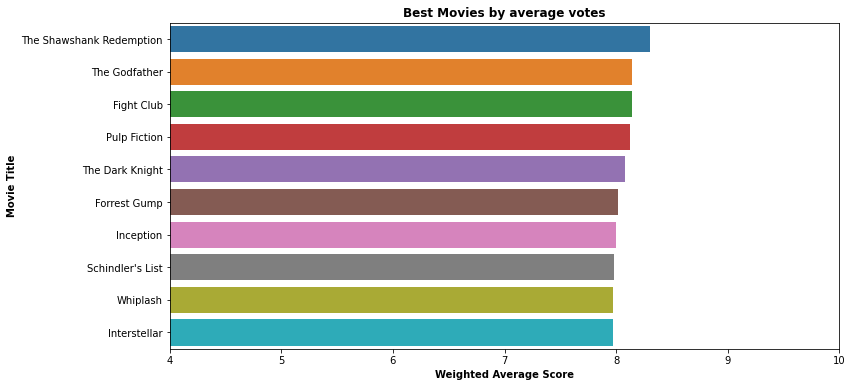

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=movies_sorted_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

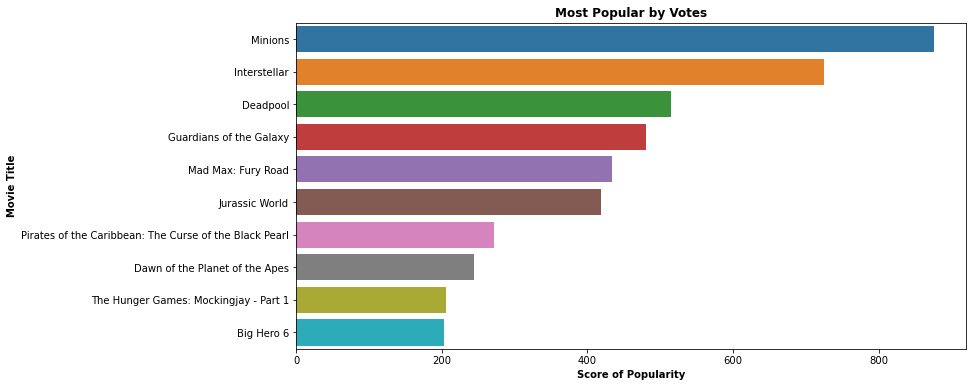

In [60]:
popularity=movies_sorted_ranking.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

### Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.665509,0.171815
1,0.565575,0.158846
2,0.417706,0.122635
3,0.766494,0.128272
4,0.368227,0.050169


In [62]:
movies_cleaned_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df
movies_cleaned_df.head()

,genres,original_title,overview,popularity,vote_average,vote_count,cast,weighted_average,normalized_weight_average,normalized_popularity
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",7.134875,0.665509,0.171815
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",6.786315,0.565575,0.158846
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",6.270561,0.417706,0.122635
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",7.487101,0.766494,0.128272
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",6.097983,0.368227,0.050169


In [63]:
movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average'] * 0.5 + movies_cleaned_df['normalized_popularity'] * 0.5
movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.905654,0.827162,0.866408
546,Minions,0.442563,1.000000,0.721281
94,Guardians of the Galaxy,0.848421,0.549462,0.698941
788,Deadpool,0.717967,0.587690,0.652828
127,Mad Max: Fury Road,0.661150,0.495989,0.578569
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.935924,0.213941,0.574932
3865,Whiplash,0.906085,0.219887,0.562986
662,Fight Club,0.953594,0.167611,0.560603
3337,The Godfather,0.954675,0.164074,0.559374


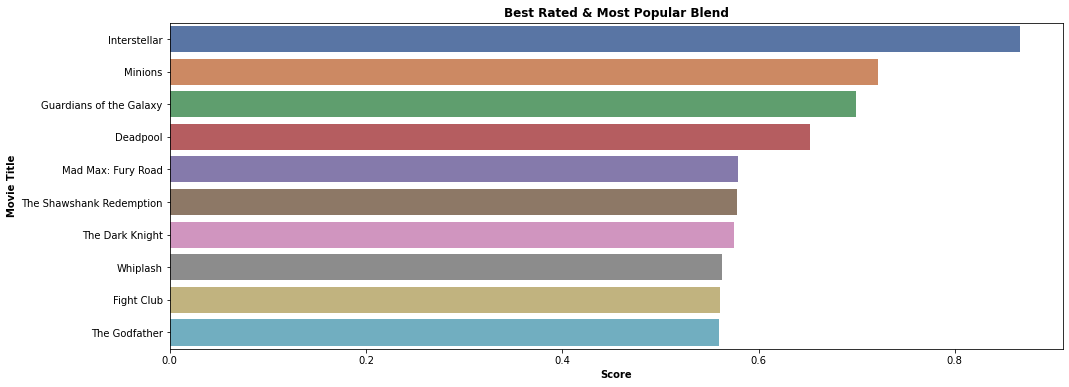

In [64]:
scored_df = movies_cleaned_df.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('scored_movies.png')